In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import print_function, division
from builtins import range, input
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [0]:
# load in the data
df = pd.read_csv('/content/drive/My Drive/JSON_Files/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

In [0]:
# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [0]:
# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 8
reg = 0. # regularization penalty

In [6]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (N, 1, K)

In [0]:
u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)

In [0]:
x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)

Train on 16000210 samples, validate on 4000053 samples
Epoch 1/8
16000210/16000210 [==============================] - 363s 23us/step - loss: 0.5362 - mean_squared_error: 0.5362 - val_loss: 0.6251 - val_mean_squared_error: 0.6251
Epoch 2/8
16000210/16000210 [==============================] - 358s 22us/step - loss: 0.5350 - mean_squared_error: 0.5350 - val_loss: 0.6257 - val_mean_squared_error: 0.6257
Epoch 3/8
16000210/16000210 [==============================] - 352s 22us/step - loss: 0.5338 - mean_squared_error: 0.5338 - val_loss: 0.6267 - val_mean_squared_error: 0.6267
Epoch 4/8
16000210/16000210 [==============================] - 352s 22us/step - loss: 0.5328 - mean_squared_error: 0.5328 - val_loss: 0.6268 - val_mean_squared_error: 0.6268
Epoch 5/8
16000210/16000210 [==============================] - 353s 22us/step - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.6271 - val_mean_squared_error: 0.6271
Epoch 6/8
16000210/16000210 [==============================] - 354s 22us/st

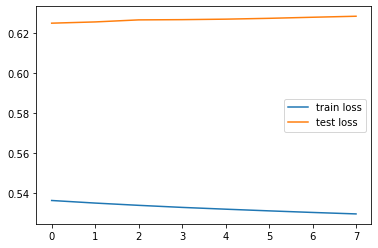

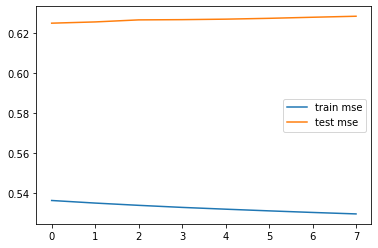

In [11]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)


# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mean_squared_error'], label="train mse")
plt.plot(r.history['val_mean_squared_error'], label="test mse")
plt.legend()
plt.show()
